In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the data from Excel file
file_path = '/home/legend/Documents/DDO/FINAL YEAR PROJECT/Online Retail.xlsx'
df = pd.read_excel(file_path)

# Display the first few rows to check if it loaded correctly
print("First 5 rows of the dataset:")
print(df.head())

# Check basic information about the dataset
print("\nDataset Information:")
print(df.info())

# Summary statistics
print("\nSummary Statistics:")
print(df.describe())

# Check for missing values
print("\nMissing Values Count:")
print(df.isnull().sum())

# Basic data exploration
print("\nUnique Countries:")
print(df['Country'].value_counts())

print("\nNumber of unique customers:")
print(df['CustomerID'].nunique())

print("\nNumber of unique products:")
print(df['StockCode'].nunique())

# Let's look at the time range of the data
print("\nDate Range:")
print("First date:", df['InvoiceDate'].min())
print("Last date:", df['InvoiceDate'].max())

First 5 rows of the dataset:
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null C

Original data shape: (541909, 8)
Cleaned data shape: (397884, 13)

--- SALES OVERVIEW ---
Total Sales: $8,911,407.90
Total Items Sold: 5,167,812
Total Transactions: 18,532
Total Customers: 4,338
Average Order Value: $480.87

--- TOP 10 COUNTRIES BY REVENUE ---
Country
United Kingdom    7308391.554
Netherlands        285446.340
EIRE               265545.900
Germany            228867.140
France             209024.050
Australia          138521.310
Spain               61577.110
Switzerland         56443.950
Belgium             41196.340
Sweden              38378.330
Name: TotalPrice, dtype: float64

--- TOP 10 PRODUCTS BY REVENUE ---
StockCode  Description                       
23843      PAPER CRAFT , LITTLE BIRDIE           168469.60
22423      REGENCY CAKESTAND 3 TIER              142592.95
85123A     WHITE HANGING HEART T-LIGHT HOLDER    100448.15
85099B     JUMBO BAG RED RETROSPOT                85220.78
23166      MEDIUM CERAMIC TOP STORAGE JAR         81416.73
POST       POSTAGE   

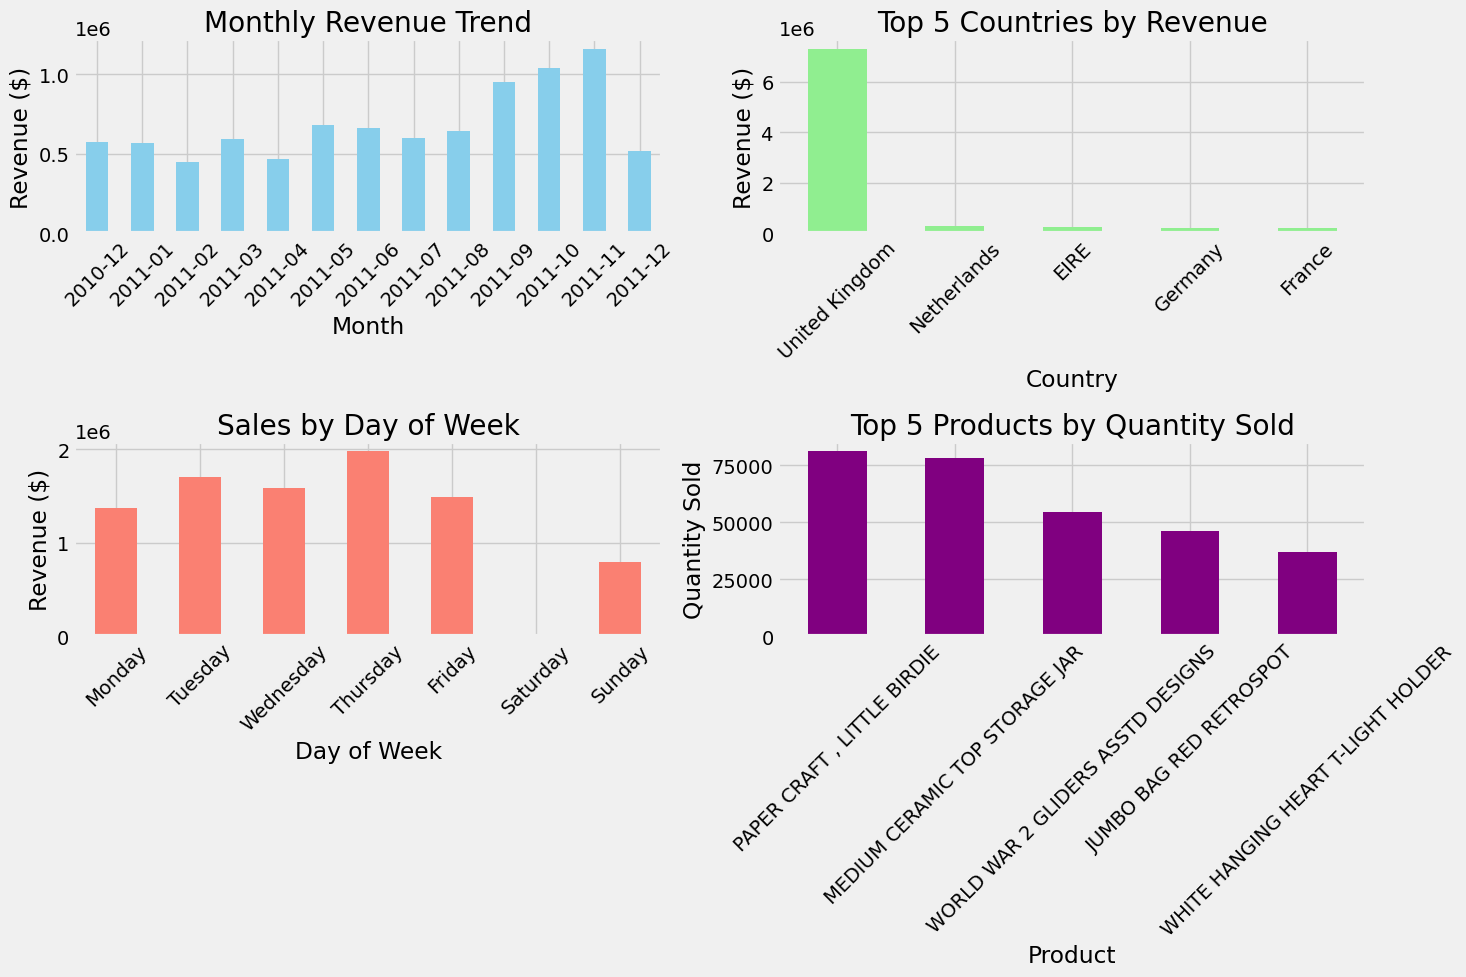


--- CUSTOMER SEGMENTS ---
Segment
Lost                  2497
Champions              618
Potential Loyalist     312
Need Attention         265
Loyal Customers        246
About to Sleep         147
Regular Customers      118
At Risk                 57
Hibernating             52
Recent Customers        26
Name: count, dtype: int64


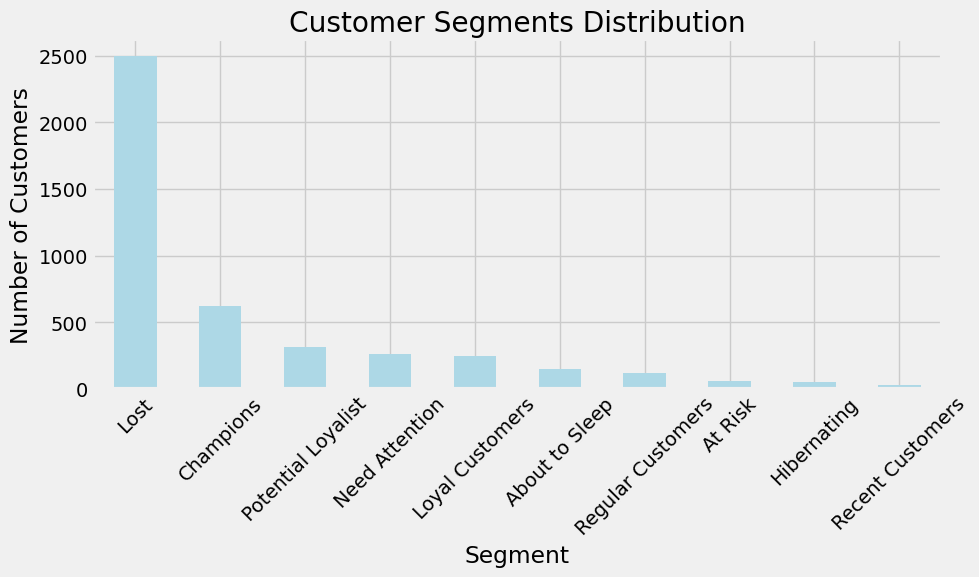


--- AVERAGE BASKET SIZE BY COUNTRY ---
Country
Netherlands    2131.500000
Australia      1471.947368
Japan          1369.263158
Sweden         1002.305556
Israel          809.200000
Singapore       748.714286
Switzerland     589.843137
EIRE            539.519231
Norway          537.111111
USA             491.600000
Name: Quantity, dtype: float64


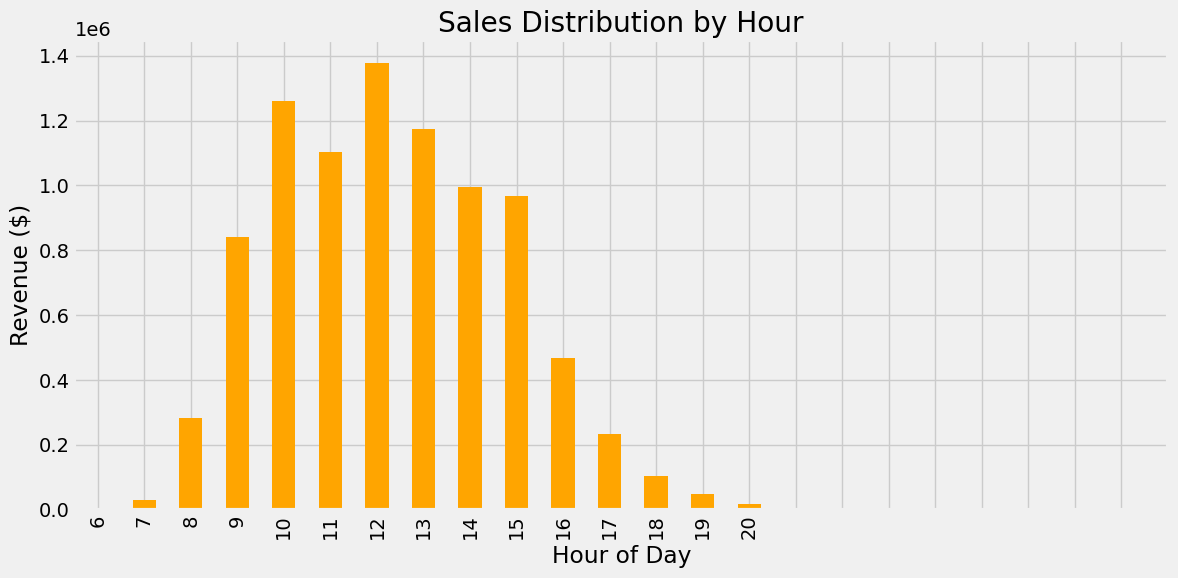


--- TOP PRODUCT PAIRS PURCHASED TOGETHER ---
                                        Product Pair  Count
0  (JUMBO BAG PINK POLKADOT, JUMBO BAG RED RETROS...    546
1  (GREEN REGENCY TEACUP AND SAUCER, ROSES REGENC...    541
2  (ALARM CLOCK BAKELIKE GREEN, ALARM CLOCK BAKEL...    530
3  (LUNCH BAG PINK POLKADOT, LUNCH BAG RED RETROS...    523
4  (LUNCH BAG  BLACK SKULL., LUNCH BAG RED RETROS...    517
5  (WOODEN FRAME ANTIQUE WHITE , WOODEN PICTURE F...    468
6  (LUNCH BAG RED RETROSPOT, LUNCH BAG SPACEBOY D...    467
7  (LUNCH BAG  BLACK SKULL., LUNCH BAG PINK POLKA...    464
8  (GARDENERS KNEELING PAD CUP OF TEA , GARDENERS...    463
9  (GREEN REGENCY TEACUP AND SAUCER, PINK REGENCY...    460

Analysis complete!


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
plt.style.use('fivethirtyeight')
sns.set_palette('Set2')

# -------------------- DATA CLEANING --------------------

# Create a function to clean the data
def clean_data(df):
    # Create a copy of the dataframe
    df_clean = df.copy()
    
    # Remove rows with missing CustomerID
    df_clean = df_clean.dropna(subset=['CustomerID'])
    
    # Convert CustomerID to integer
    df_clean['CustomerID'] = df_clean['CustomerID'].astype(int)
    
    # Remove rows with negative or zero quantities
    df_clean = df_clean[df_clean['Quantity'] > 0]
    
    # Remove rows with negative or zero unit price
    df_clean = df_clean[df_clean['UnitPrice'] > 0]
    
    # Create a Total Price column
    df_clean['TotalPrice'] = df_clean['Quantity'] * df_clean['UnitPrice']
    
    # Extract date from InvoiceDate
    df_clean['InvoiceDate'] = pd.to_datetime(df_clean['InvoiceDate'])
    df_clean['Date'] = df_clean['InvoiceDate'].dt.date
    df_clean['Month'] = df_clean['InvoiceDate'].dt.to_period('M')
    df_clean['Day'] = df_clean['InvoiceDate'].dt.day_name()
    
    # Flag for canceled orders (invoice numbers that start with 'C')
    df_clean['Canceled'] = df_clean['InvoiceNo'].astype(str).str.startswith('C')
    
    return df_clean

# Load and clean data
df_clean = clean_data(df)

print(f"Original data shape: {df.shape}")
print(f"Cleaned data shape: {df_clean.shape}")

# -------------------- EXPLORATORY DATA ANALYSIS --------------------

# 1. Sales Overview
print("\n--- SALES OVERVIEW ---")
total_sales = df_clean[~df_clean['Canceled']]['TotalPrice'].sum()
total_quantity = df_clean[~df_clean['Canceled']]['Quantity'].sum()
total_transactions = df_clean[~df_clean['Canceled']]['InvoiceNo'].nunique()
total_customers = df_clean['CustomerID'].nunique()
avg_order_value = total_sales / total_transactions

print(f"Total Sales: ${total_sales:,.2f}")
print(f"Total Items Sold: {total_quantity:,}")
print(f"Total Transactions: {total_transactions:,}")
print(f"Total Customers: {total_customers:,}")
print(f"Average Order Value: ${avg_order_value:.2f}")

# 2. Top Countries by Revenue
print("\n--- TOP 10 COUNTRIES BY REVENUE ---")
country_sales = df_clean[~df_clean['Canceled']].groupby('Country')['TotalPrice'].sum().sort_values(ascending=False).head(10)
print(country_sales)

# 3. Top Products by Revenue
print("\n--- TOP 10 PRODUCTS BY REVENUE ---")
product_sales = df_clean[~df_clean['Canceled']].groupby(['StockCode', 'Description'])['TotalPrice'].sum().sort_values(ascending=False).head(10)
print(product_sales)

# 4. Monthly Revenue Trend
monthly_sales = df_clean[~df_clean['Canceled']].groupby('Month')['TotalPrice'].sum()
print("\n--- MONTHLY REVENUE TREND ---")
print(monthly_sales)

# 5. Sales by Day of Week
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_sales = df_clean[~df_clean['Canceled']].groupby('Day')['TotalPrice'].sum()
daily_sales = daily_sales.reindex(day_order)
print("\n--- SALES BY DAY OF WEEK ---")
print(daily_sales)

# -------------------- VISUALIZATIONS --------------------

# Plot settings
plt.figure(figsize=(15, 10))

# 1. Monthly Revenue Trend
plt.subplot(2, 2, 1)
monthly_sales.plot(kind='bar', color='skyblue')
plt.title('Monthly Revenue Trend')
plt.xlabel('Month')
plt.ylabel('Revenue ($)')
plt.xticks(rotation=45)

# 2. Top 5 Countries by Revenue
plt.subplot(2, 2, 2)
country_sales.head(5).plot(kind='bar', color='lightgreen')
plt.title('Top 5 Countries by Revenue')
plt.xlabel('Country')
plt.ylabel('Revenue ($)')
plt.xticks(rotation=45)

# 3. Sales by Day of Week
plt.subplot(2, 2, 3)
daily_sales.plot(kind='bar', color='salmon')
plt.title('Sales by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Revenue ($)')
plt.xticks(rotation=45)

# 4. Product Analysis - Top 5 Products by Quantity
top_products_qty = df_clean[~df_clean['Canceled']].groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(5)
plt.subplot(2, 2, 4)
top_products_qty.plot(kind='bar', color='purple')
plt.title('Top 5 Products by Quantity Sold')
plt.xlabel('Product')
plt.ylabel('Quantity Sold')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# -------------------- CUSTOMER ANALYSIS --------------------

# RFM Analysis (Recency, Frequency, Monetary)
# We'll set the reference date as the last date in our dataset + 1 day
max_date = df_clean['InvoiceDate'].max().date()
from datetime import timedelta
reference_date = max_date + timedelta(days=1)

# Calculate RFM metrics
rfm = df_clean[~df_clean['Canceled']].groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (reference_date - x.dt.date.max()).days,  # Recency
    'InvoiceNo': 'nunique',  # Frequency
    'TotalPrice': 'sum'  # Monetary
})

# Rename columns
rfm.columns = ['Recency', 'Frequency', 'Monetary']

# Create RFM segments
rfm['R_Score'] = pd.qcut(rfm['Recency'], q=5, labels=[5, 4, 3, 2, 1])  # 5 is best (lowest recency)
rfm['F_Score'] = pd.qcut(rfm['Frequency'].rank(method='first'), q=5, labels=[1, 2, 3, 4, 5])  # 5 is best
rfm['M_Score'] = pd.qcut(rfm['Monetary'].rank(method='first'), q=5, labels=[1, 2, 3, 4, 5])  # 5 is best

# Combine RFM scores
rfm['RFM_Score'] = rfm['R_Score'].astype(str) + rfm['F_Score'].astype(str) + rfm['M_Score'].astype(str)

# Define segments
def rfm_segment(rfm_score):
    if rfm_score in ['555', '554', '545', '454', '544']:
        return 'Champions'
    elif rfm_score in ['535', '534', '444', '435', '355']:
        return 'Loyal Customers'
    elif rfm_score in ['543', '443', '434', '344', '343']:
        return 'Potential Loyalist'
    elif rfm_score in ['333', '334', '335', '343', '344']:
        return 'Regular Customers'
    elif rfm_score in ['553', '551', '552', '541', '542']:
        return 'Recent Customers'
    elif rfm_score in ['525', '524', '523', '522', '521']:
        return 'At Risk'
    elif rfm_score in ['512', '511', '422', '421', '412']:
        return 'About to Sleep'
    elif rfm_score in ['311', '411', '331', '321', '312']:
        return 'Need Attention'
    elif rfm_score in ['252', '253', '254', '255', '152']:
        return 'Hibernating'
    else:
        return 'Lost'

rfm['Segment'] = rfm['RFM_Score'].apply(rfm_segment)

# Show segment counts
segment_counts = rfm['Segment'].value_counts()
print("\n--- CUSTOMER SEGMENTS ---")
print(segment_counts)

# Visualize customer segments
plt.figure(figsize=(10, 6))
segment_counts.plot(kind='bar', color='lightblue')
plt.title('Customer Segments Distribution')
plt.xlabel('Segment')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# -------------------- BASKET ANALYSIS --------------------

print("\n--- AVERAGE BASKET SIZE BY COUNTRY ---")
basket_size = df_clean[~df_clean['Canceled']].groupby(['Country', 'InvoiceNo'])['Quantity'].sum().reset_index()
avg_basket_size = basket_size.groupby('Country')['Quantity'].mean().sort_values(ascending=False).head(10)
print(avg_basket_size)

# -------------------- TIME-BASED PATTERNS --------------------

# Hourly sales distribution
df_clean['Hour'] = df_clean['InvoiceDate'].dt.hour
hourly_sales = df_clean[~df_clean['Canceled']].groupby('Hour')['TotalPrice'].sum()

plt.figure(figsize=(12, 6))
hourly_sales.plot(kind='bar', color='orange')
plt.title('Sales Distribution by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Revenue ($)')
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()

# -------------------- PRODUCT ASSOCIATION ANALYSIS --------------------

# Generate product pairs that are purchased together
# We'll look at the top product pairs that appear in the same transaction
from itertools import combinations

# Get all transactions
transactions = df_clean[~df_clean['Canceled']].groupby(['InvoiceNo', 'Description'])['Quantity'].sum().reset_index()

# Create a list of items for each transaction
transaction_items = transactions.groupby('InvoiceNo')['Description'].apply(list).reset_index()

# Count product pairs
pairs = []
for items in transaction_items['Description']:
    if len(items) > 1:
        pairs.extend(list(combinations(items, 2)))

# Create a DataFrame of product pairs
pair_counts = pd.Series(pairs).value_counts().reset_index()
pair_counts.columns = ['Product Pair', 'Count']

# Show the top product pairs
print("\n--- TOP PRODUCT PAIRS PURCHASED TOGETHER ---")
print(pair_counts.head(10))

print("\nAnalysis complete!")